The dataset can be download from Kaggle <br>
https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

C:\Users\Lenovo\anaconda3\envs\dataml100\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/My Git Repo/DataScienceGuide/DataScienceGuide/DataSets/Penguins/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<Axes: >

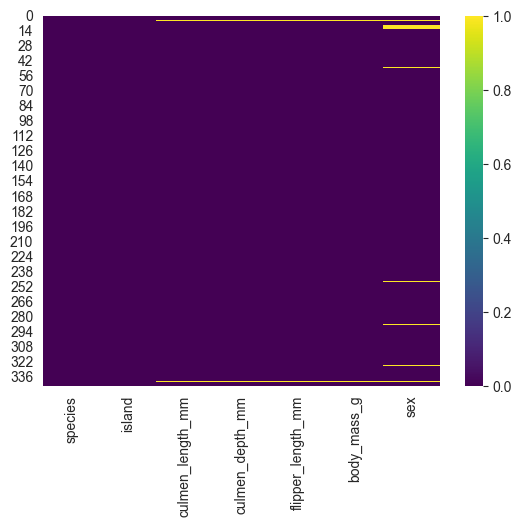

In [5]:
sns.heatmap(df.isnull(),cmap="viridis")

In [6]:
df[df['culmen_length_mm'].isna()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [7]:
#As these 2 rows have no data, and are less in number, and not part of imbalanced data so we remove them. 
df.drop(index=[3,339],inplace=True)
df.reset_index(drop=True,inplace=True)

<Axes: >

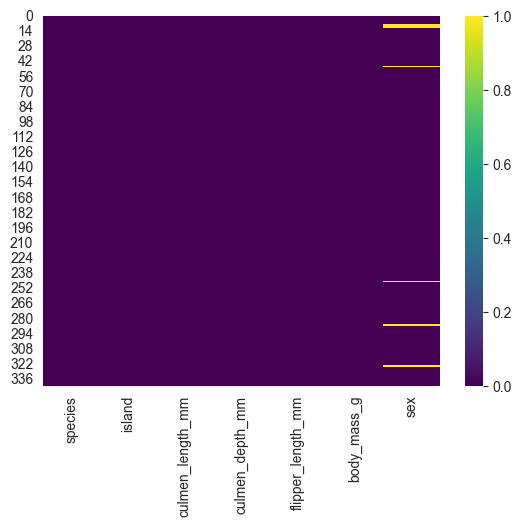

In [8]:
sns.heatmap(df.isnull(),cmap="viridis")

<Axes: xlabel='sex', ylabel='count'>

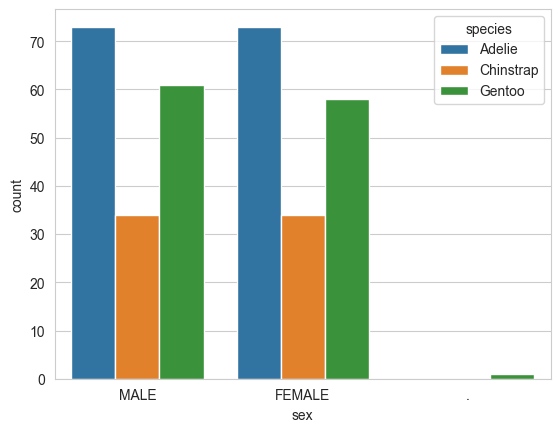

In [9]:
sns.countplot(x=df['sex'],hue=df['species'])

In [10]:
#How many Sex values are missing
print(sum(df['sex'].isna()), len(df[~df['sex'].fillna('').str.lower().str.contains("male")]))

8 9


In [11]:
df[~df['sex'].fillna('').str.lower().str.contains("male")]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
7,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
8,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
9,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
10,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
46,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
245,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
285,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
323,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
335,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


Now you can <br>
1- Either assign constant such as Male/Female according to your choice to all. <br>
2- See which class they belong to and assign that class highest probability sex choice<br>
3- Use class and body specifications to assign Sex. <br>

I am gonna use 3rd option but using it again take to Question ok, which method for all these columns.<br> 
You can do logistic regression with Sex as output, You can do K Nearest Neighbour by finding sex of closest penguins in specs. 

In [12]:
df2 = pd.get_dummies(df['species'],drop_first=True,prefix="specie")
df2

,specie_Chinstrap,specie_Gentoo
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
337,0,1
338,0,1
339,0,1
340,0,1


In [13]:
#I am gonna go KNN.Lets drop unnecessary columns for KNN
sexDf= pd.concat([df,df2],axis=1)
indexes_with_missing_sex = df[~df['sex'].fillna('').str.lower().str.contains("male")].index.tolist() #To delete rows
TestSexDf2 = sexDf.iloc[indexes_with_missing_sex]
sexDf = sexDf.drop(indexes_with_missing_sex,axis=0)
targetsexDf = sexDf['sex']

In [14]:
sexDf.drop(['species','island','sex'],axis=1,inplace=True)
TestSexDf2.drop(['species','island','sex'],axis=1,inplace=True)

Now you are ready to Train KNN model to find out your Sex parameter values, Before that scaling is necessary for Distance algorithms <br>
A good Article on Scaling to Choose b/w Standard Scaler/MinMax Scaler<br>
https://forecastegy.com/posts/standardscaler-vs-minmaxscaler-difference/

<b>Highlights of Article </b><br>
It’s important to split your data before scaling because if you scale the entire dataset, you may cause data leakage.<br>
Data leakage occurs when information that is not available in the real world is used to train your machine learning model.This can lead to overfitting and poor performance on new data.In the real world, you will not have access to the mean and standard deviation values for your test data features when training your model.Therefore, you should only use the train data to fit the scaler and then transform both the train and test data.<br>

No, it’s not mandatory to use scaling techniques in every machine learning project.However, many machine learning algorithms, especially those that rely on distance calculations or gradient-based optimization, are sensitive to the scale of the input features.
On the other hand, there are algorithms, such as decision trees and random forests, that are not sensitive to the scale of the input data and do not require scaling.

In [15]:
#Standard Scaling is less suspectible to outliers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(sexDf, targetsexDf, test_size=0.20, random_state=42)

In [17]:
X_train.shape

(266, 6)

In [18]:
X_test.shape

(67, 6)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Building & Predictions

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
Model = KNeighborsClassifier(n_neighbors=3)

In [22]:
Model.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
predictions = Model.predict(X_test_scaled)
predictions

array(['FEMALE', 'FEMALE', 'MALE', 'MALE', 'MALE', 'FEMALE', 'MALE',
       'MALE', 'FEMALE', 'MALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE',
       'MALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE',
       'MALE', 'MALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'MALE',
       'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'FEMALE',
       'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'MALE',
       'FEMALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE', 'MALE', 'MALE',
       'FEMALE', 'MALE', 'MALE', 'MALE', 'MALE', 'MALE', 'FEMALE',
       'FEMALE', 'MALE', 'MALE', 'FEMALE'], dtype=object)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

<Axes: >

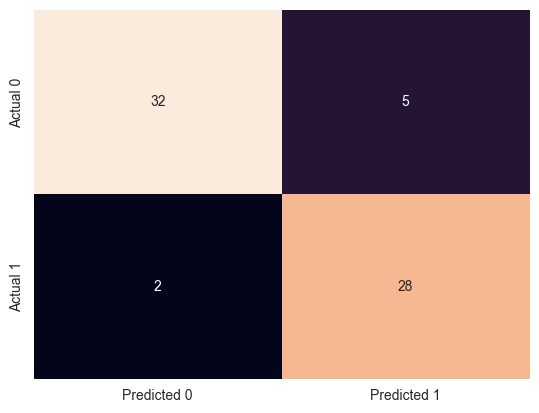

In [25]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt=".0f",cbar=False,xticklabels=['Predicted 0', 'Predicted 1'],yticklabels=['Actual 0', 'Actual 1'])

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      FEMALE       0.94      0.86      0.90        37
        MALE       0.85      0.93      0.89        30

    accuracy                           0.90        67
   macro avg       0.89      0.90      0.90        67
weighted avg       0.90      0.90      0.90        67



### Now Find Sex of Missing Data

In [27]:
TestSexDf2

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,specie_Chinstrap,specie_Gentoo
7,34.1,18.1,193.0,3475.0,0,0
8,42.0,20.2,190.0,4250.0,0,0
9,37.8,17.1,186.0,3300.0,0,0
10,37.8,17.3,180.0,3700.0,0,0
46,37.5,18.9,179.0,2975.0,0,0
245,44.5,14.3,216.0,4100.0,0,1
285,46.2,14.4,214.0,4650.0,0,1
323,47.3,13.8,216.0,4725.0,0,1
335,44.5,15.7,217.0,4875.0,0,1


In [28]:
#Now lets Scale Our Data. 
X_New_test_scaled = scaler.transform(TestSexDf2)

In [29]:
Model.predict(X_New_test_scaled)

array(['FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'MALE'], dtype=object)

##### Finding Best K Using Elbow Method

In [30]:
'''Now to find best K in KNN use elbow method'''
error_rate=[]

for i in range(1,40):
    Model = KNeighborsClassifier(n_neighbors=i)
    Model.fit(X_train_scaled,y_train)
    predictions = Model.predict(X_test_scaled)
    error_rate.append(np.mean(predictions != y_test)) #Np.Mean value is basicall Sum of True Predictions/Total Predictions

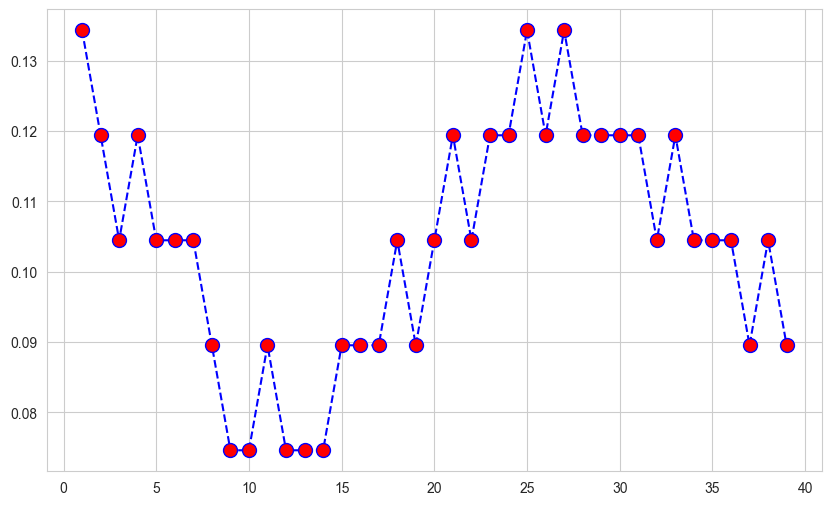

In [31]:
#Linestyle is the way line drwan, marker tells where actually points are in plot
plt.figure(figsize=(10,6)) #To make our graph size bigger
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.show()







              precision    recall  f1-score   support

      FEMALE       0.94      0.92      0.93        37
        MALE       0.90      0.93      0.92        30

    accuracy                           0.93        67
   macro avg       0.92      0.93      0.92        67
weighted avg       0.93      0.93      0.93        67



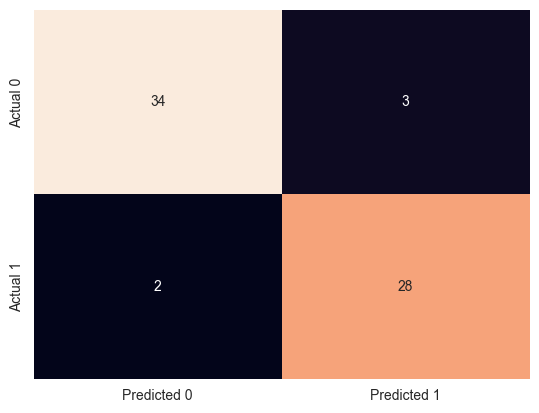

In [32]:
'''So now after seeing figure you know that at K=9 Your error is minimum , nOW TRAIN YOUR MODEL According to it'''
Model = KNeighborsClassifier(n_neighbors=9)
Model.fit(X_train_scaled,y_train)
predictions = Model.predict(X_test_scaled)
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt=".0f",cbar=False,xticklabels=['Predicted 0', 'Predicted 1'],yticklabels=['Actual 0', 'Actual 1'])
print("\n\n\n\n\n")
print(classification_report(y_test,predictions))

In [33]:
Newpredictions = Model.predict(X_New_test_scaled)

In [34]:
df[df['sex'].isna()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
7,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
8,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
9,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
10,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
46,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
245,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
285,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
323,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


In [35]:
df.loc[indexes_with_missing_sex, 'sex'] = Newpredictions

<Axes: >

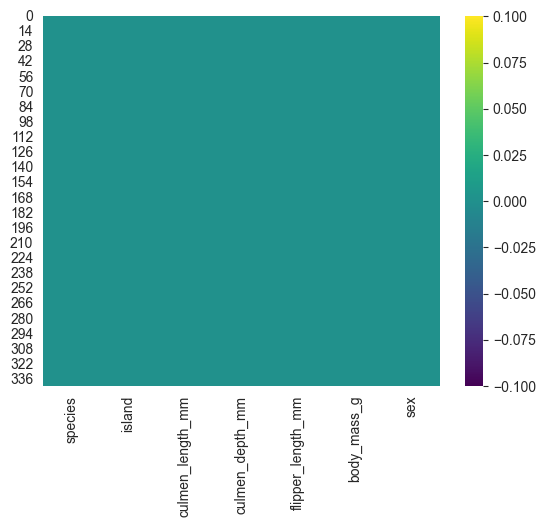

In [36]:
sns.heatmap(df.isnull(),cmap="viridis")

## Now moving Towards Original Task 

In [37]:
dummDf = pd.get_dummies(df["island"],drop_first=True)

In [38]:
dummDf2 = pd.get_dummies(df['sex'],drop_first=True,prefix="sex_")

In [39]:
df2 = pd.concat([df,dummDf,dummDf2],axis=1)

In [40]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
338,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
339,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
340,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [41]:
df2

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Dream,Torgersen,sex__MALE
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0,1,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0,1,0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0,1,0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0,1,1
...,...,...,...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,0,0,0
338,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0,0,0
339,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,0,0,1
340,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0,0,0


In [42]:
Y_Data = df2['species']
df2.drop(['species','island','sex'],inplace=True,axis=1)

In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_Data_encoded = label_encoder.fit_transform(Y_Data)

In [49]:
print(df.head(2),"\n\n\n",df2.head(2),"\n\n\n",Y_Data.head(2),"\n\n\n",np.unique(Y_Data_encoded))

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE   


    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  Dream  \
0              39.1             18.7              181.0       3750.0      0   
1              39.5             17.4              186.0       3800.0      0   

   Torgersen  sex__MALE  
0          1          1  
1          1          0   


 0    Adelie
1    Adelie
Name: species, dtype: object 


 [0 1 2]


In [50]:
X_train, X_test, y_train, y_test = train_test_split(df2, Y_Data_encoded, test_size=0.30, random_state=42)

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now as this is Multi-class problem, simple logistic regression won't work. We will move to Multiclass Logistic Regression. <br>
Two approaches for this <br>
1- One-vs-All (OvA or OvR) :- In the one-vs-all strategy, a separate binary logistic regression model is trained for each class.For each model, one class is treated as the positive class, and all other classes are grouped together as the negative class.During prediction, the class with the highest predicted probability from all models is chosen as the final predicted class.<br>
2- Multinomial Logistic Regression (Softmax Regression) :- n multinomial logistic regression, also known as softmax regression, the model is designed to handle multiple classes directly.It uses the softmax function to compute probabilities for each class. The softmax function ensures that the predicted probabilities sum to 1 across all classes.It considers all classes simultaneously during training.

In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() # By default 
model2 = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [54]:
print(model.fit(X_train_scaled,y_train))
print(model2.fit(X_train_scaled,y_train))

LogisticRegression()
LogisticRegression(multi_class='multinomial')


In [57]:
prediction = model.predict(X_test_scaled)

In [58]:
prediction2 = model2.predict(X_test_scaled)

In [59]:
print(confusion_matrix(y_test,prediction))

[[50  0  0]
 [ 0 18  0]
 [ 0  0 35]]


In [60]:
print(confusion_matrix(y_test,prediction2))

[[50  0  0]
 [ 0 18  0]
 [ 0  0 35]]


In [61]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        35

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



In [62]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        35

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103

